<a href="https://colab.research.google.com/github/GeneroyEconomia/GeneroyEconomia/blob/main/modulo_3/code/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

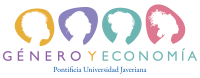

# **Sesión 3: Introducción a Geopandas**

---

Autor: Andrés Felipe Díaz Rodríguez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
1. Introducción a GeoPandas
2. Visualización gráfica de mapas en Python
3. Shapely y operaciones geométricas
4. Marco Geoestadístico Nacional (MGN) y Divipola
5. Shapefiles
6. Censo Naiconal de Población y vivienda
7. Visualización geográfica de la población que requiere cuidado en Colombia

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html, en la sección Módulo 3.

### **Introducción a Geopandas**

GeoPandas es una librería que tiene com objetivo utilizar datos geoespaiciales en Python. Combina objetos de Pandas con información espacial y permite hacer operaciones en datos de tipo geométrico.

#### **GIS**

Un sistema de información geográfica (GIS por sus siglas en inglés) es un sistema informático para capturar, almacenar, comprobar y mostrar datos relacionados con posiciones en la superficie terrestre. Los GIS pueden mostrar muchos tipos diferentes de datos en un mapa, como calles, edificios y vegetación. Esto permite a las personas ver, analizar y comprender más fácilmente patrones y relaciones.

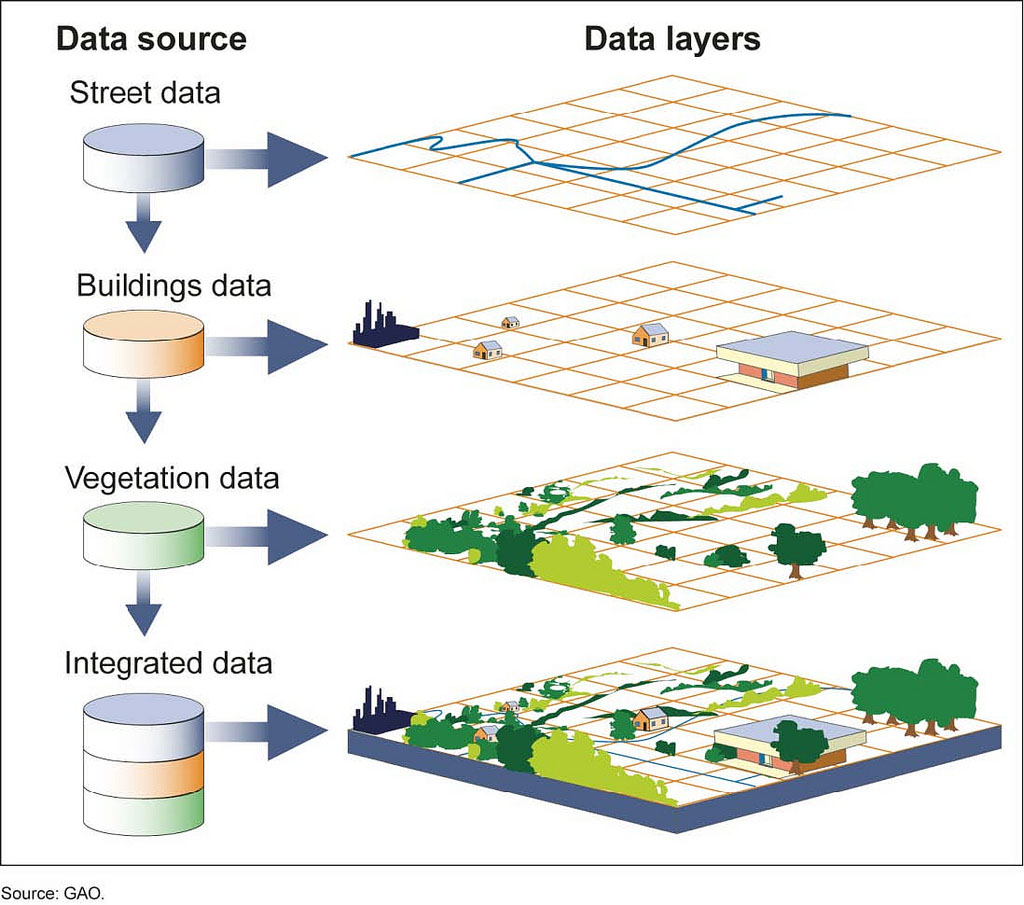

### **Visualización gráfica de mapas en Python**


### **Shapely y operaciones geométricas**

GeoPandas se basa en la definición de objetos geométrico y operaciones sobre estos para poder visualizar y trabajar con información espacial. La librería **Shapely** es la que se encarga de realizar estas operaciones.

Shapely añade un tipo de datos llamado `Geometry` y define las siguientes estructuras geométricas básicas:

1. **Point**: Un punto en el espacio representado por una coordenada `x` y `y`
2. **LineString**: una línea compuesta de uno o mas segmentos.
3. LinearRing: una geometría compuesta de una o más líenas que forman un circuito cerrado.
4. **Polygon**: un polígono que representa un área en el espacio demarcada por un LinearRing.
5. MultiPoint: colección de uno o más puntos
6. MultiLineString: colección de uno o más LineStrings.
7. **MultiPolygon**: colección de uno o más Polygons.
8. GeometryCollection: una colección de una o más geometrías que pueden ser de distintos tipos.

Las geometrías `Point`, `LineString`, `Polygon` y `MultiPolygon` son las que principalmente utilizará GeoPandas. A continuación exploraremos cómo se definen estos objetos y algunas de las operaciones que reciben.

#### **Visualización de geometrías**

POINT (-1.2 1.1)


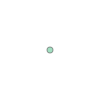

In [ ]:
# Point recibe un par de números que definen sus coordenadas
from shapely import Point
punto = Point(-1.2, 1.1)
print(punto)
punto

LINESTRING (0 0, 1 2, 1 -1.5)


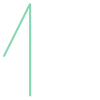

In [ ]:
# Linestring recibe una lista de coordenadas que serán unidas por una línea
from shapely import LineString
líneas = LineString([(0, 0), (1, 2), (1,-1.5)])
print(líneas)
líneas

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))


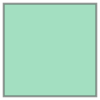

In [ ]:
# Polygon recibe una serie de coordenadas que definen los vértices del polígono
from shapely import Polygon
polígono = Polygon(((0., 0.), (0., 1.), (1., 1.), (1., 0.), (0., 0.)))
print(polígono)
polígono

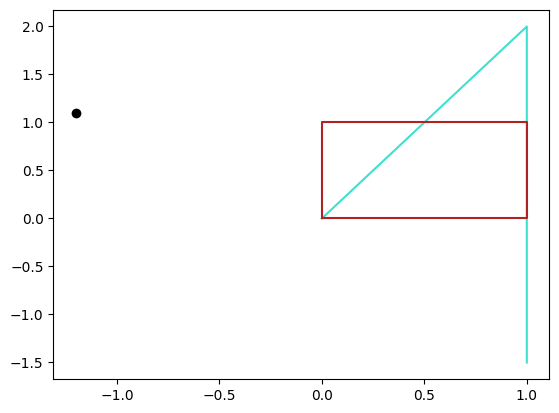

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

x,y = punto.xy
ax.scatter(x,y,c="black")

x,y = líneas.xy
ax.plot(x,y,c="turquoise")

x,y = polígono.exterior.xy
ax.plot(x,y,c="firebrick")

plt.show()

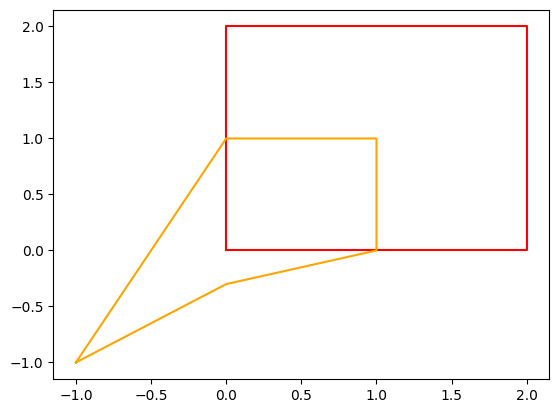

In [ ]:
p1 = Polygon(((0., 0.), (0., 2.), (2., 2.), (2., 0.), (0., 0.)))
p2 = Polygon(((-1., -1.), (0., 1.), (1., 1.), (1., 0.), (0., -0.3)))

fig,ax = plt.subplots()

x,y = p1.exterior.xy
ax.plot(x,y,c="red")

x,y = p2.exterior.xy
ax.plot(x,y,c="orange")

plt.show()

#### **Algunas operaciones de Shapely**

**`area`**: Permite calcular el área de una geometría. Los puntos y líneas no tienen área (es igual a cero) pero los polígonos sí.

In [ ]:
print(punto.area)
print(líneas.area)
print(p1.area)
print(p2.area)

0.0
0.0
4.0
1.8


**`length`**: calcula la longitud de un LineString o el perímetro de un polígono. Un objeto de punto tiene una longitud de cero.

In [ ]:
print(punto.length)
print(líneas.length)
print(p1.length)
print(p2.length)

0.0
5.73606797749979
8.0
6.500754189964216


**`bounds`**: calcula los límites que contienen una geometría. Este método devuelve una caja dentro de la cual está contenido el objeto entero.

In [ ]:
print(punto.bounds)
print(líneas.bounds)
print(p1.bounds)
print(p2.bounds)

(-1.2, 1.1, -1.2, 1.1)
(0.0, -1.5, 1.0, 2.0)
(0.0, 0.0, 2.0, 2.0)
(-1.0, -1.0, 1.0, 1.0)


**`buffer`**: genera un área más amplia alrededor de una geometría. Recibe como argumento la distancia del radio que define el tamaño del buffer.

POLYGON ((0.8 1.1, 0.7903694533443939 0.9039657193408789, 0.7615705608064609 0.7098193559677436, 0.7138806714644177 0.5194306454910754, 0.6477590650225735 0.3346331352698205, 0.5638425286967101 0.1572065263480048, 0.4629392246050905 -0.0111404660392043, 0.346020906725474 -0.1687865683272909, 0.2142135623730952 -0.3142135623730948, 0.068786568327291 -0.4460209067254739, -0.0888595339607954 -0.5629392246050904, -0.2572065263480043 -0.6638425286967098, -0.4346331352698203 -0.7477590650225734, -0.6194306454910753 -0.8138806714644178, -0.8098193559677433 -0.8615705608064608, -1.0039657193408784 -0.8903694533443935, -1.1999999999999997 -0.8999999999999999, -1.3960342806591213 -0.8903694533443938, -1.5901806440322563 -0.8615705608064608, -1.7805693545089243 -0.8138806714644178, -1.9653668647301794 -0.7477590650225734, -2.142793473651995 -0.66384252869671, -2.3111404660392036 -0.5629392246050908, -2.4687865683272907 -0.4460209067254741, -2.614213562373095 -0.3142135623730951, -2.74602090672547

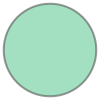

In [ ]:
print(punto.buffer(2))
punto.buffer(2)

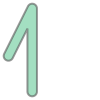

In [ ]:
líneas.buffer(0.2)

**`centroid`**: calcula el centro de masa de un obgeto geométrico.

In [ ]:
print(punto.centroid)
print(líneas.centroid)
print(p1.centroid)
print(p2.centroid)

POINT (-1.2 1.1)
POINT (0.8050870399138439 0.5423694401292342)
POINT (1 1)
POINT (0.1851851851851852 0.2333333333333333)


**`intersection`**: devuelve la geometría que se intersecta entre dos objetos. Para esta operación no importa el orden en el que se calcule, el resultado será el mismo.

Si las dos geometrías nunca se cruzan, el resultado será vacío.

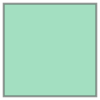

In [ ]:
p1.intersection(p2)

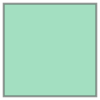

In [ ]:
p2.intersection(p1)

**`difference`**: devuelve la geometría de un objeto que no se intersecta con otro. El orden en el que se aplica esta operación es importante.

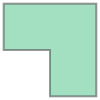

In [ ]:
p1.difference(p2)

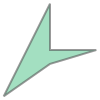

In [ ]:
p2.difference(p1)

**`union`**: combina varias geometrías en una sola.

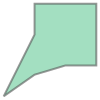

In [ ]:
p2.union(p1)

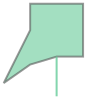

In [ ]:
p2.union(p1).union(líneas)

**Ejercicio**: partiendo de las geometrías definidas realicemos lo siguiente
1. Crear un buffer con un radio de 30 unidades para `punto`.
2. Calcular la diferencia entre `poli` y el buffer anterior.
3. Calcular el centroide del polígono.
4. Graficar el centroide del polígono, la diferencia del numeral 2 y el punto original en un mismo plano con colores distintos.

In [ ]:
poli = Polygon([[0, 0],[200, 0],[200, 100],[100, 100],[100, 200],[0, 200]])
punto = Point(100,80)

### **Marco Geoestadístico Nacional (MGN) y Divipola**

<cite>Es un sistema constituido por la División Político Administrativa (departamentos, municipios) y áreas geoestadísticas (cabeceras municipales, centros poblados, resto rural, entre otras), delimitadas principalmente por accidentes naturales y culturales, identificables en terreno, que contiene para cada área geoestadística variables sociodemográficas.</cite> ([DANE, 2018](https://geoportal.dane.gov.co/descargas/descarga_mgn/220207-MGN2018press.pdf))


<cite>El MGN está constituido por áreas geoestadísticas (departamentos, municipios, cabeceras municipales, centros poblados, rural disperso, entre otras)...Comprende: 1101 municipios del país, 20 áreas no municipalizadas y la isla de San Andrés.</cite> ([DANE, 2018](https://www.dane.gov.co/files/sen/lineamientos/manual-uso-marco-geoestadistico-nacional-en-proceso-estadistico.pdf))

**Toda la información geoestadística de Colombia está regida y es publicada por el DANE.**

**[Geovisor del MGN](https://geoportal.dane.gov.co/geovisores/territorio/mgn-marco-geoestadistico-nacional/)**

#### **Divipola**
La codificación de la División Político Administrativa (Divipola) es un número que identifica de manera única a todos los municipios y departamentos de Colombia. Un municipio tiene un código de 5 dígitos donde los primeros 2 indican el departamento y los últimos 3 el municipio. Estos son algunos ejemplos:

* El código de Antioquia es "05" y el código del municipio de Amalfi es "031" por lo que el Divipola completo es "**05031**"
* El código del Valle del Cauca es "76" y el código de Tuluá es "834", de modo que el Divipola de Tuluá es "**76834**"

Generalmente, las capitales de los departamentos tienen el código "001" pero no para Cundinamarca ya que es un departamento sin capital (el código "25001" corresponde a Agua de Dios, Cundinamarca).

**Ejercicio**: ¿Cuál es el código Divipola del municipio donde viven? ¿y el del municipio donde nacieron?

Buscando en google se pueden encontrar muchas fuentes de información que contienen la codificación del Divipola en distintos formatos.

### **Shapefiles**


#### **¿Qué son?**

Un shapefile es un **formato de archivo geoespacial** popularizado por Esri, utilizado principalmente para almacenar datos vectoriales, como puntos, líneas y polígonos. Es ampliamente utilizado en Sistemas de Información Geográfica (GIS) para representar características geográficas.

Un shapefile consta de varios archivos, pero los tres más importantes son:

* **.shp**: almacena la geometría de las entidades geográficas.
* **.shx**: contiene un índice de la geometría.
* **.dbf**: almacena los atributos de las entidades en un formato de base de datos.

#### **¿Cómo se obtienen?**

Dado que el DANE es el ente oficial que distribuye el material cartográfico, su geoportal tiene un sitio de descarga de los shapefiles del país: [Descargas geoportal DANE](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/?cod=111)

**Ejercicio**: Descarguen los archivos a nivel departamental y municipal y cárguenlos en el entorno de colab.

In [ ]:
# ¿Cómo descomprimir el archivo para poder acceder a sus contenidos?
!unzip MGN2023_DPTO_POLITICO.zip -d MGN2023_DPTO_POLITICO

Archive:  MGN2023_DPTO_POLITICO.zip
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.cpg  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.dbf  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.prj  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.sbn  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.sbx  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shp  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shp.xml  
  inflating: MGN2023_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shx  


In [ ]:
!unzip MGN2023_MPIO_POLITICO.zip -d shape_municipios

Archive:  MGN2023_MPIO_POLITICO.zip
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.cpg  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.dbf  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.prj  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.sbn  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.sbx  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shp  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shp.xml  
  inflating: shape_municipios/MGN_ADM_MPIO_GRAFICO.shx  


#### **¿Cómo se utilizan en Python?**
Geopandas puede leer los archivos que componen el shapefile desde una ruta especificada.

In [ ]:
import os
import geopandas as gpd

In [ ]:
# Con os.listdir() podemos ver los archivos que componen un shapefile
os.listdir("MGN2023_DPTO_POLITICO")

['MGN_ADM_DPTO_POLITICO.prj',
 'MGN_ADM_DPTO_POLITICO.shp.xml',
 'MGN_ADM_DPTO_POLITICO.dbf',
 'MGN_ADM_DPTO_POLITICO.sbn',
 'MGN_ADM_DPTO_POLITICO.shp',
 'MGN_ADM_DPTO_POLITICO.sbx',
 'MGN_ADM_DPTO_POLITICO.cpg',
 'MGN_ADM_DPTO_POLITICO.shx']

In [ ]:
# Ruta al archivo Shapefile
ruta_shapefile = "MGN2023_DPTO_POLITICO"

# Cargar el archivo Shapefile
gdf = gpd.read_file(ruta_shapefile)

In [ ]:
# Obtener información sobre el GeoDataFrame
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  33 non-null     object  
 1   dpto_cnmbr  33 non-null     object  
 2   dpto_ano_c  33 non-null     int64   
 3   dpto_act_a  33 non-null     object  
 4   dpto_narea  33 non-null     float64 
 5   dpto_nano   33 non-null     int64   
 6   shape_Leng  33 non-null     float64 
 7   shape_Area  33 non-null     float64 
 8   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(3)
memory usage: 2.4+ KB


In [ ]:
# Visualizar algunas filas del GeoDataFrame
gdf.sample(6)

,dpto_ccdgo,dpto_cnmbr,dpto_ano_c,dpto_act_a,dpto_narea,dpto_nano,shape_Leng,shape_Area,geometry
27,88,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",1991,Artículo 310 Constitucion Politica de 1991,49.417693,2023,0.683362,0.004049,"MULTIPOLYGON (((-81.68843 12.54957, -81.68845 ..."
29,94,GUAINÍA,1991,Articulo 309 Constitucion Politica de 1991,71289.354682,2023,21.179051,5.747937,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."
5,17,CALDAS,1905,11 de Abril de 1905,7425.220161,2023,6.664502,0.605498,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
9,23,CÓRDOBA,1951,Ley 9 del 18 de Diciembre de 1951,25086.282521,2023,9.711248,2.057511,"POLYGON ((-75.88119 9.42363, -75.87940 9.42346..."
1,08,ATLÁNTICO,1910,Ley 21 de 1910,3314.458393,2023,2.571601,0.273823,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."
0,05,ANTIOQUIA,1886,Constitucion Politica de 1886,62807.004377,2023,21.492797,5.135103,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."


<Axes: >

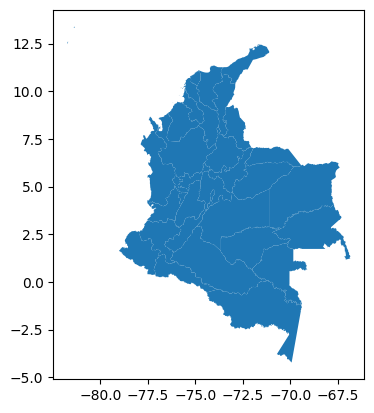

In [ ]:
# Visualizar la geometría de los datos
gdf.plot()

<Axes: >

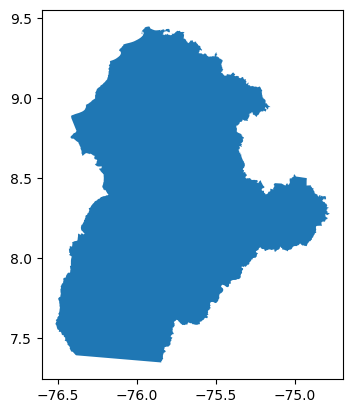

In [ ]:
# Podemos filtrarlo igual que cualquier DataFrame
gdf.loc[gdf["dpto_ccdgo"]=="23"].plot()

Podemos añadir color a cada geometría según el valor de una columna

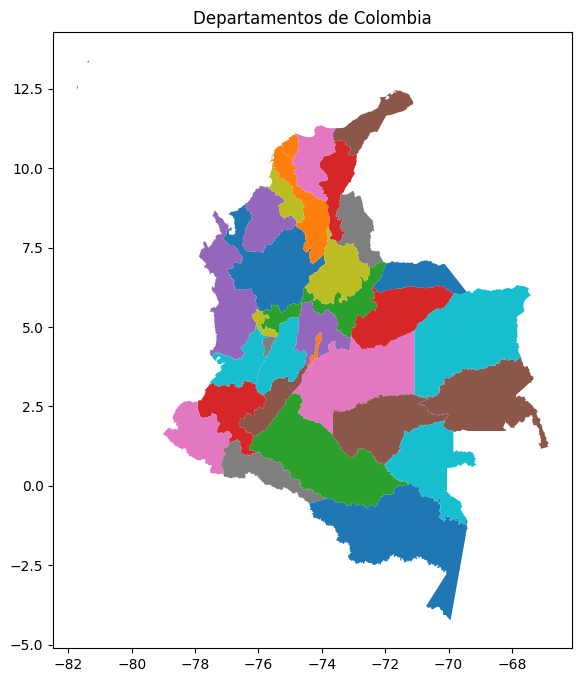

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.plot(ax=ax,column="dpto_cnmbr")
ax.set_title("Departamentos de Colombia")

plt.show()

También puede ser según una variable numérica

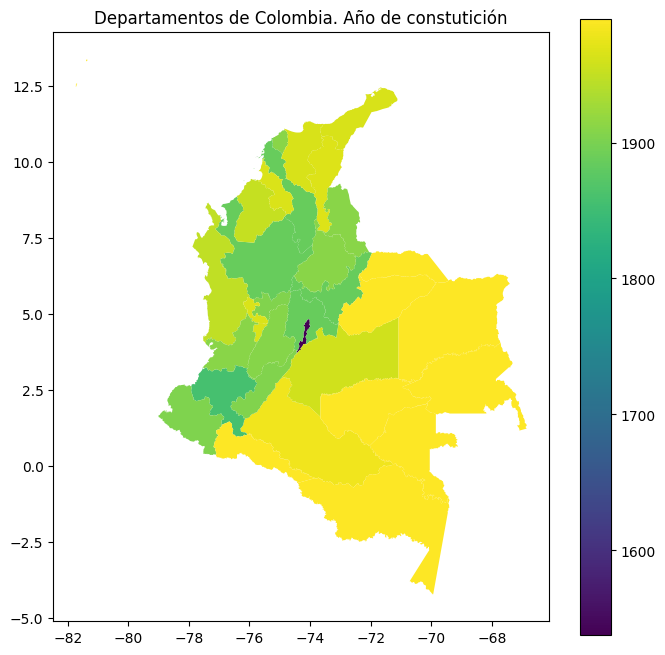

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.plot(ax=ax,column="dpto_ano_c",legend=True)
ax.set_title("Departamentos de Colombia. Año de constutición")

plt.show()

Dado que la fecha de fundación de Bogotá es mucho antes que la de los demás departamentos, podemos filtrarlo para ver mejor la del resto del país.

Aprovechemos para eliminar las marcas en los ejes ya que en este caso no nos dan nada de información.

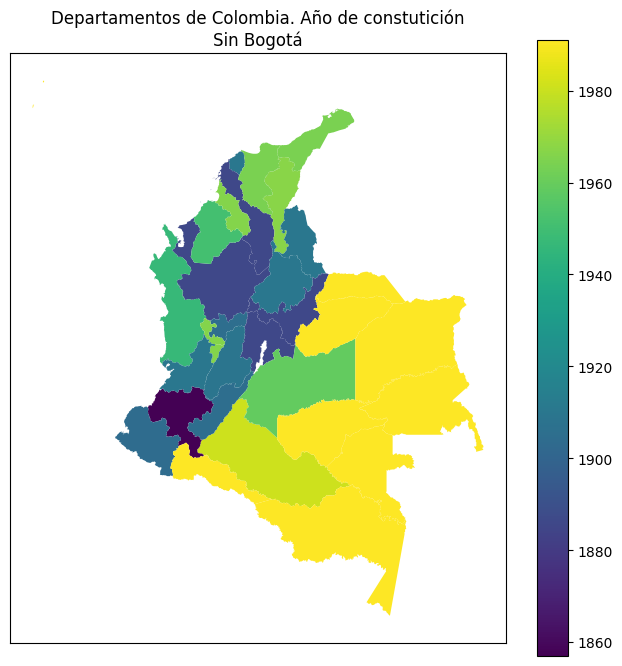

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

gdf.loc[gdf["dpto_ccdgo"]!="11"].plot(ax=ax,column="dpto_ano_c",legend=True)
ax.set_title("Departamentos de Colombia. Año de constutición\nSin Bogotá")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

Dado que la isla de San Andrés queda retirada del resto del país y es muy pequeña, resulta más práctico a veces no graficarlo de la misma forma que la parte continental de Colombia.

**Ejercicio**: filtren `gdf` para que no se incluya San Andrés (ni Bogotá). recuerden buscar el código Divipola del departamento.

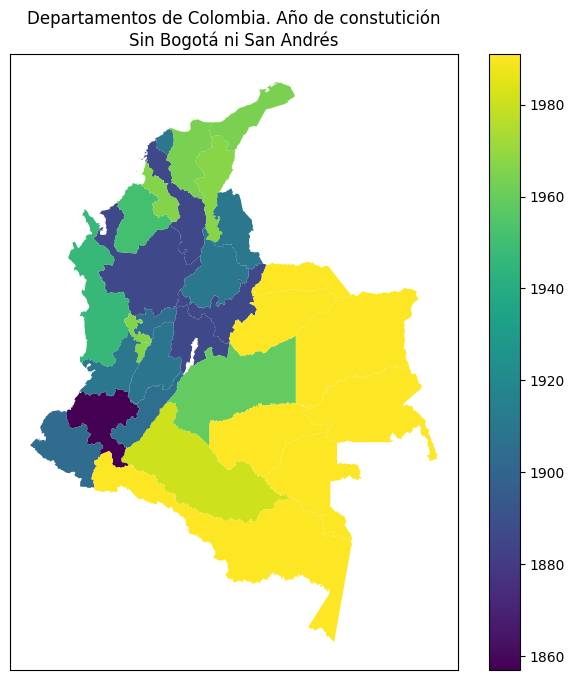

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

...

plt.show()

### **Censo Nacional de Población y Vivienda**
Con base en los microdatos del Censo Nacional de Población y Vivienda del 2018 podemos hacer una visualización del tejido demográfico de Colombia.

[Obtener los microdatos](https://microdatos.dane.gov.co/index.php/catalog/643/get-microdata). Estos archivos están a nivel de municipio, por lo que requieren cierto preprocesamiento para agregarlos. Acá descargaremos un archivo que preparamos donde están juntos todos los municpios.

In [ ]:
# Descarga el archivo con lo smicrodatos del censo
!gdown --id 1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rcAryLQQslZI9a1jFjtbCQ2XkJKE2Wdi
To: /content/agregado_censo_2018.csv
100% 9.35M/9.35M [00:00<00:00, 55.3MB/s]


In [ ]:
import pandas as pd
per_df = pd.read_csv("agregado_censo_2018.csv")

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N
321691,68,322,3,2,6,5,2.0,48
396401,86,219,1,2,6,2,1.0,9
402280,86,865,1,1,6,14,2.0,70
166960,23,672,2,1,1,16,2.0,3
354346,73,283,2,2,6,11,2.0,40


**Variables a utilizar**
* **U_DPTO**: código de dos dígitos del departamento.
* **U_MPIO**: código de tres dígitos del municipio.
* **UA_CLASE**: clase de la población (1: Cabecera Municipal, 2: Centro Poblado, 3**: Rural Disperso).
* **P_SEXO**: sexo de la persona (1: Hombre, 2: Mujer).
* **PA1_GRP_ETNIC**: grupo étnico al que pertenece la persona (1: Indígena, 2: Gitano(a) o Rrom, 3: Raizal del Archipielago de San Andrés, Providencia y Santa Catalina, 4: Palenquero(a) de San Basilio, 5: Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a), 6: Ningún grupo étnico).
* **P_EDADR**: grupo de edad de cada persona. No es la edad exacta, sino que está agrupada en franjas de 5 años (de 0 a 4, de 5 a 9, de 10 a 14, etc...)
* **CONDICION_FISICA**: indica si la persona tiene alguna dificultad física en su vida diaria (1: Sí, 2: No)
* **N**: cantidad de personas que representa cada observación.

In [ ]:
print(f'Hay {per_df["N"].sum()} personas en la base de datos del censo')

Hay 44164417 personas en la base de datos del censo


Para este ejercicio vamos a identificar cuántas personas están dentro de la población que requiere cuidado en Colombia. Para esto podemos hacer varias agrupaciones:
1. Edad: personas menores de 15 y mayores de 60 años.
2. Condifión física: personas que respondieron que cuentan con dificultades físicas en su vida diaria.

In [ ]:
# Separamos las edades según las categorías de la variable P_EDADR
per_df["grupos_edad"] = pd.cut(per_df["P_EDADR"],[0,3,12,22],labels=["0-14","15-59","60+"],right=True)
per_df["grupos_edad"].value_counts().sort_index()

grupos_edad
0-14      66370
15-59    215963
60+      132401
Name: count, dtype: int64

In [ ]:
per_df["CONDICION_FISICA"] = per_df["CONDICION_FISICA"].astype(int)

In [ ]:
dict_censo_2018 = {
    'UA_CLASE': {'1': 'Cabecera Municipal','2': 'Centro Poblado','3': 'Rural Disperso','4': 'Resto Rural'},
    'P_SEXO': {'1': 'Hombre', '2': 'Mujer'},
    'CONDICION_FISICA': {'1': 'SI', '2': 'NO', '9': 'NA'},
    'P_EDADR': {
        '1': 'de 00 A 04 Años','2': 'de 05 A 09 Años','3': 'de 10 A 14 Años',
        '4': 'de 15 A 19 Años','5': 'de 20 A 24 Años','6': 'de 25 A 29 Años',
        '7': 'de 30 A 34 Años','8': 'de 35 A 39 Años','9': 'de 40 A 44 Años',
        '10': 'de 45 A 49 Años','11': 'de 50 A 54 Años','12': 'de 55 A 59 Años',
        '13': 'de 60 A 64 Años','14': 'de 65 A 69 Años','15': 'de 70 A 74 Años',
        '16': 'de 75 A 79 Años','17': 'de 80 A 84 Años','18': 'de 85 A 89 Años',
        '19': 'de 90 A 94 Años','20': 'de 95 A 99 Años','21': 'de 100 y más Años'
        },
}

In [ ]:
for k,v in dict_censo_2018.items() :
    if k not in per_df :
        continue
    per_df[f"{k}_lab"] = per_df[k].astype(str).map(v)

per_df["divipola"] = (per_df["U_DPTO"]*1000) + per_df["U_MPIO"]

In [ ]:
per_df.sample(5)

,U_DPTO,U_MPIO,UA_CLASE,P_SEXO,PA1_GRP_ETNIC,P_EDADR,CONDICION_FISICA,N,grupos_edad,UA_CLASE_lab,P_SEXO_lab,CONDICION_FISICA_lab,divipola,edad_aux,P_EDADR_lab
362660,73,678,1,2,5,6,2,3,15-59,Cabecera Municipal,Mujer,NO,73678,6,de 25 A 29 Años
127079,19,300,2,1,9,7,2,2,15-59,Centro Poblado,Hombre,NO,19300,7,de 30 A 34 Años
206846,27,25,3,1,5,16,2,33,60+,Rural Disperso,Hombre,NO,27025,16,de 75 A 79 Años
170551,23,807,3,2,9,5,2,14,15-59,Rural Disperso,Mujer,NO,23807,5,de 20 A 24 Años
302988,63,302,3,1,6,12,2,122,15-59,Rural Disperso,Hombre,NO,63302,12,de 55 A 59 Años


In [ ]:
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

per_df["edad_aux"] = per_df["P_EDADR"]
per_df.loc[per_df["P_EDADR"]>=18,"edad_aux"] = 85
per_df["edad_lab_aux"] = per_df["P_EDADR_lab"]
per_df.loc[per_df["P_EDADR"]>=18,"edad_lab_aux"] = "85+"

pop_pyramid = per_df.groupby(["edad_lab_aux","edad_aux","P_SEXO_lab"],dropna=False)["N"].sum().reset_index()
pop_pyramid.head(10)

,edad_lab_aux,edad_aux,P_SEXO_lab,N
0,85+,85,Hombre,168018
1,85+,85,Mujer,256392
2,de 00 A 04 Años,1,Hombre,1555605
3,de 00 A 04 Años,1,Mujer,1482176
4,de 05 A 09 Años,2,Hombre,1705574
5,de 05 A 09 Años,2,Mujer,1629666
6,de 10 A 14 Años,3,Hombre,1848218
7,de 10 A 14 Años,3,Mujer,1762366
8,de 15 A 19 Años,4,Hombre,1970530
9,de 15 A 19 Años,4,Mujer,1881725


In [ ]:
pop_pyramid = pop_pyramid.pivot(index=["edad_lab_aux","edad_aux"],columns="P_SEXO_lab",values="N").reset_index()
pop_pyramid["label"] = pop_pyramid["edad_lab_aux"].apply(lambda s: "-".join(re.findall("[0-9]+",s))).str.replace("85","85+")
pop_pyramid.head(10)

P_SEXO_lab,edad_lab_aux,edad_aux,Hombre,Mujer,label
0,85+,85,168018,256392,85+
1,de 00 A 04 Años,1,1555605,1482176,00-04
2,de 05 A 09 Años,2,1705574,1629666,05-09
3,de 10 A 14 Años,3,1848218,1762366,10-14
4,de 15 A 19 Años,4,1970530,1881725,15-19
5,de 20 A 24 Años,5,1983553,1956735,20-24
6,de 25 A 29 Años,6,1835158,1857016,25-29
7,de 30 A 34 Años,7,1649783,1700746,30-34
8,de 35 A 39 Años,8,1560417,1656227,35-39
9,de 40 A 44 Años,9,1308328,1436336,40-44


In [ ]:
hom_pop = pop_pyramid["Hombre"].sum()
muj_pop = pop_pyramid["Mujer"].sum()
tot_pop = hom_pop + muj_pop

print("La población de hombres es:",hom_pop)
print("La población de mujeres es:",muj_pop)
print("La población total es:",tot_pop)

La población de hombres es: 21570493
La población de mujeres es: 22593924
La población total es: 44164417


In [ ]:
pop_pyramid["Hombre_width"] = pop_pyramid["Hombre"].div(tot_pop*-1)
pop_pyramid["Mujer_width"] = pop_pyramid["Mujer"].div(tot_pop)

pop_pyramid.sort_values("edad_aux",inplace=True)
pop_pyramid

P_SEXO_lab,edad_lab_aux,edad_aux,Hombre,Mujer,label,Hombre_width,Mujer_width
1,de 00 A 04 Años,1,1555605,1482176,00-04,-0.035223,0.033560
2,de 05 A 09 Años,2,1705574,1629666,05-09,-0.038619,0.036900
3,de 10 A 14 Años,3,1848218,1762366,10-14,-0.041849,0.039905
4,de 15 A 19 Años,4,1970530,1881725,15-19,-0.044618,0.042607
5,de 20 A 24 Años,5,1983553,1956735,20-24,-0.044913,0.044306
6,de 25 A 29 Años,6,1835158,1857016,25-29,-0.041553,0.042048
7,de 30 A 34 Años,7,1649783,1700746,30-34,-0.037355,0.038509
8,de 35 A 39 Años,8,1560417,1656227,35-39,-0.035332,0.037501
9,de 40 A 44 Años,9,1308328,1436336,40-44,-0.029624,0.032522
10,de 45 A 49 Años,10,1245829,1400272,45-49,-0.028209,0.031706


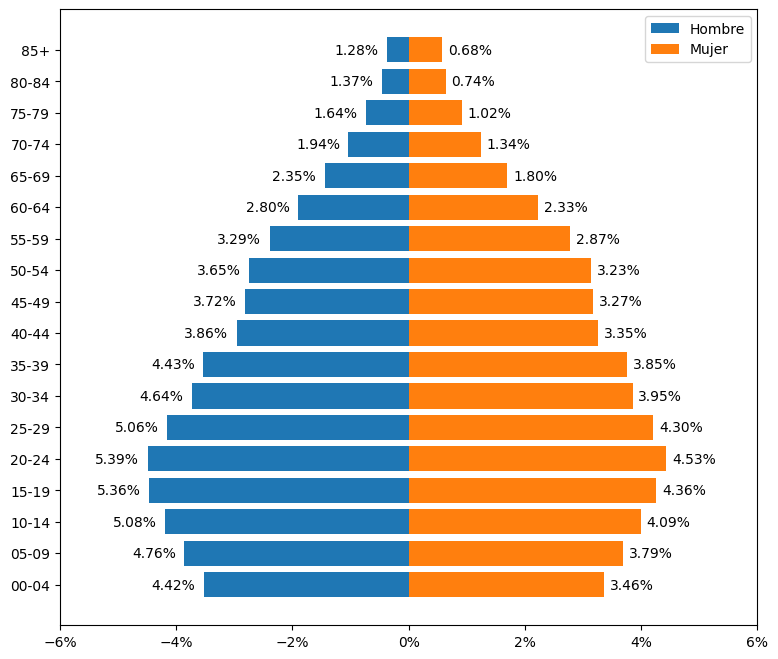

In [ ]:
fig,ax = plt.subplots(figsize=(9,8))

for s in ["Hombre","Mujer"] :
    rect = ax.barh(pop_pyramid["label"],pop_pyramid[f"{s}_width"],label=s)
    if s == "Mujer" :
        offset_x = 0.001
        sign_x = 1
    else :
        offset_x = -0.009
        sign_x = -1
    for r in rect :
        rx = r.get_width() + offset_x
        ry = r.get_y() + (r.get_height()/3)
        ax.annotate(f"{rx*sign_x:.2%}",(rx,ry))

ax.legend()

ax.set_xlim([-0.06,0.06])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))

plt.show()

### **Visualización geográfica de la población que requiere cuidado en Colombia**


In [ ]:
mpio_gdf = gpd.read_file("shape_municipios")

In [ ]:
mpio_gdf.sample(5)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,dpto_cnmbr,mpio_cnmbr,mpio_crslc,mpio_tipo,mpio_narea,mpio_nano,shape_Leng,shape_Area,geometry
250,15,466,15466,BOYACÁ,MONGUÍ,1621,MUNICIPIO,68.854408,2023,0.359844,0.005618,"POLYGON ((-72.85264 5.75183, -72.85261 5.75174..."
607,41,016,41016,HUILA,AIPE,1912,MUNICIPIO,795.630625,2023,2.139396,0.064708,"POLYGON ((-75.31817 3.41627, -75.31804 3.41596..."
633,41,770,41770,HUILA,SUAZA,1842,MUNICIPIO,429.667174,2023,0.939422,0.034893,"POLYGON ((-75.82093 1.99762, -75.82078 1.99747..."
854,68,121,68121,SANTANDER,CABRERA,1869,MUNICIPIO,65.574309,2023,0.351571,0.005360,"POLYGON ((-73.25696 6.62130, -73.25637 6.62120..."
859,68,162,68162,SANTANDER,CERRITO,1775,MUNICIPIO,421.081443,2023,0.971672,0.034431,"POLYGON ((-72.68299 7.00856, -72.68277 7.00795..."


In [ ]:
mpio_gdf.dtypes

dpto_ccdgo      object
mpio_ccdgo      object
mpio_cdpmp      object
dpto_cnmbr      object
mpio_cnmbr      object
mpio_crslc      object
mpio_tipo       object
mpio_narea     float64
mpio_nano        int64
shape_Leng     float64
shape_Area     float64
geometry      geometry
dtype: object

In [ ]:
mpio_gdf["divipola"] = mpio_gdf["mpio_cdpmp"].astype(int)

Vamos a agrupar por municipio la cantidad total de personas y la cantidad total de personas que requieren cuidado (menores a 15 y mayores a 60 años y que tienen alguna dificultad física).

Lo primero es utilizar los datos del censo para calcular el total de estas categorías a nivel municipal:

In [ ]:
censo_municipio = per_df.groupby("divipola")["N"].sum().reset_index()
censo_municipio

,divipola,N
0,5001,2372330
1,5002,17599
2,5004,2159
3,5021,3839
4,5030,26821
...,...,...
1117,97889,756
1118,99001,19788
1119,99524,9690
1120,99624,4026


In [ ]:
# Calculemos cuántas personas son menores a 15 y mayores a 60 en cada municipio
mun_edad_cuidado = per_df.loc[~per_df["grupos_edad"].isin(["15-59"])].groupby("divipola")["N"].agg("sum").reset_index()
mun_edad_cuidado.columns = ["divipola","N_edad_cuidado"]

In [ ]:
censo_municipio = censo_municipio.merge(
    mun_edad_cuidado,
    on="divipola",
    how="left",
    validate="1:1"
)
censo_municipio.sample(10)

,divipola,N,N_edad_cuidado
906,68549,4508,1634
456,23815,40033,16970
309,15822,4530,1932
478,25214,31868,10461
448,23660,94020,36915
1029,76403,11058,4484
466,25120,4512,1652
549,25779,6073,2491
312,15837,8154,3393
1007,76036,18132,6751


**Ejercicio**: creen una nueva columna donde esté el número de personas que tienen alguna dificultad física y llámenla `N_dificultad`.

In [ ]:
# Solución

,divipola,N,N_edad_cuidado,N_dificultad
843,66682,71174,25983,7042.0
1057,85125,11431,4768,884.0
16,5079,44757,15050,3253.0
240,15368,3540,1541,394.0
812,54720,21243,8291,1122.0
86,5631,81797,23956,5043.0
237,15332,3921,1730,297.0
55,5321,7038,2525,339.0
647,44279,40852,16229,1454.0
259,15514,2930,1195,655.0


Ahora hay que pegar `censo_municipio` al GeoDataFrame a nivel municipal para tener la información geográfica.

In [ ]:
mpio_gdf_cuidado = mpio_gdf.merge(
    censo_municipio,
    on="divipola",
    how="left",
    validate="1:1"
)
mpio_gdf_cuidado.sample(5)

,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,dpto_cnmbr,mpio_cnmbr,mpio_crslc,mpio_tipo,mpio_narea,mpio_nano,shape_Leng,shape_Area,geometry,divipola,N,N_edad_cuidado,N_dificultad
721,52,083,52083,NARIÑO,BELÉN,Ordenanza 53 Noviembre 29 de 1985,MUNICIPIO,41.845406,2023,0.373284,0.003392,"POLYGON ((-77.07227 1.63422, -77.07214 1.63422...",52083,5968,2086,1469.0
369,19,142,19142,CAUCA,CALOTO,1543,MUNICIPIO,264.801383,2023,1.315453,0.021508,"POLYGON ((-76.42046 3.20755, -76.42033 3.20733...",19142,25416,9353,2871.0
383,19,513,19513,CAUCA,PADILLA,Ordenanza 4 de Diciembre 14 de 1967,MUNICIPIO,69.683425,2023,0.397177,0.005661,"POLYGON ((-76.34808 3.24189, -76.34775 3.24152...",19513,8763,3197,910.0
1015,76,126,76126,VALLE DEL CAUCA,CALIMA,Ordenanza 49 de Junio 23 de 1939,MUNICIPIO,793.497982,2023,1.544198,0.064485,"POLYGON ((-76.51747 4.06617, -76.51653 4.06615...",76126,16054,5834,2078.0
474,25,178,25178,CUNDINAMARCA,CHIPAQUE,1852,MUNICIPIO,150.549554,2023,0.729765,0.012266,"POLYGON ((-74.05607 4.50904, -74.05591 4.50902...",25178,8633,3337,1406.0


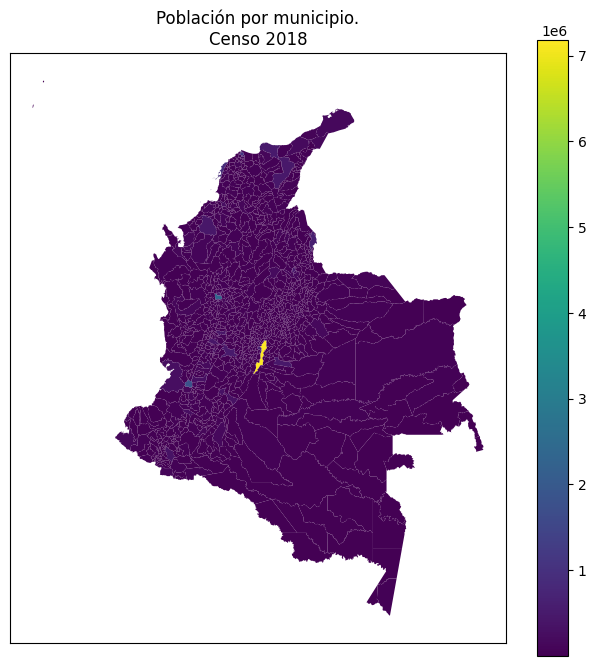

In [ ]:
bfig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.plot(ax=ax,column="N",legend=True)
ax.set_title("Población por municipio.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

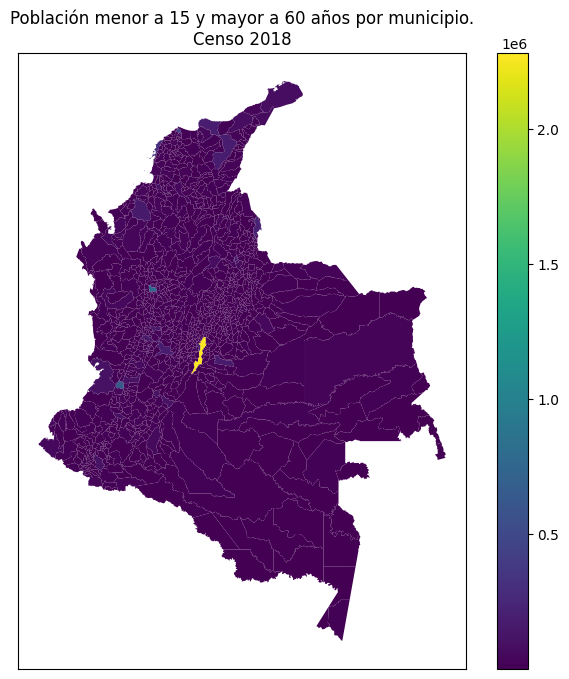

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.plot(ax=ax,column="N_edad_cuidado",legend=True)
ax.set_title("Población menor a 15 y mayor a 60 años por municipio.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

Como podemos ver, hay tres municipios que tienen mucha población con respecto a todos los demás y sesgan la escala. Para corregir esto podemos ver la cantidad de personas que requieren cuidado *per capita*, es decir como proporción de la población total.

In [ ]:
mpio_gdf_cuidado["N_edad_cuidado_per_cap"] = mpio_gdf_cuidado["N_edad_cuidado"].div(mpio_gdf_cuidado["N"])
mpio_gdf_cuidado["N_dificultad_per_cap"] = mpio_gdf_cuidado["N_dificultad"].div(mpio_gdf_cuidado["N"])

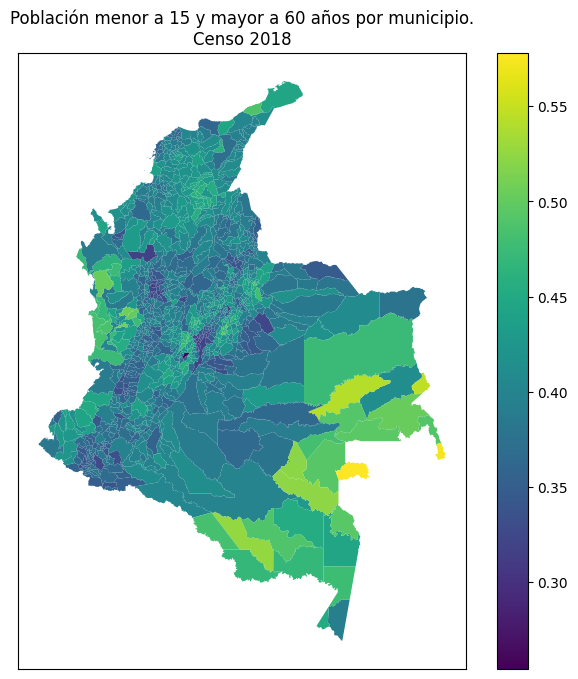

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]!="88"].plot(ax=ax,column="N_edad_cuidado_per_cap",legend=True)
ax.set_title("Población menor a 15 y mayor a 60 años por municipio.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

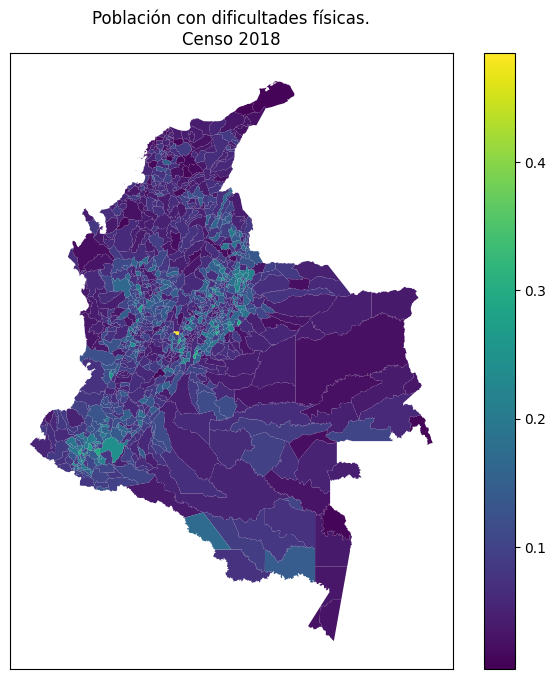

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))

mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]!="88"].plot(ax=ax,column="N_dificultad_per_cap",legend=True)
ax.set_title("Población con dificultades físicas.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

#### **Filtrar un solo departamento**

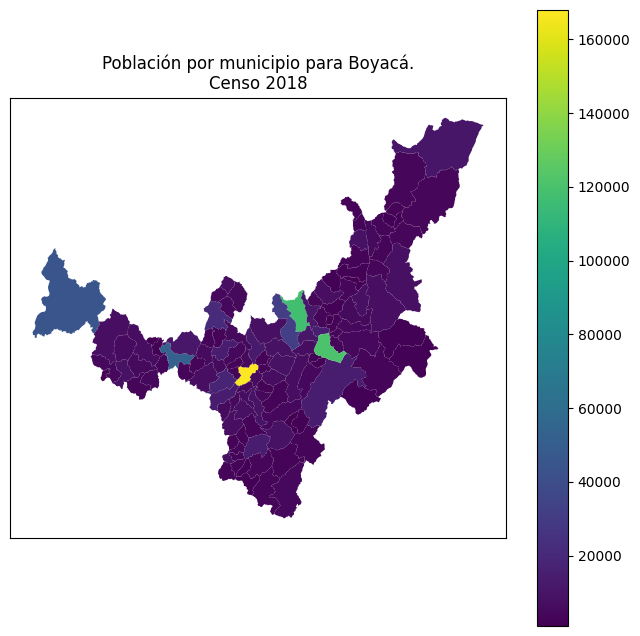

In [ ]:
mpio_filtrado = mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]=="15"]
dpto_nombre = mpio_filtrado["dpto_cnmbr"].unique()[0]

fig,ax = plt.subplots(figsize=(8,8))

mpio_filtrado.plot(ax=ax,column="N",legend=True)
ax.set_title(f"Población por municipio para {dpto_nombre.title()}.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

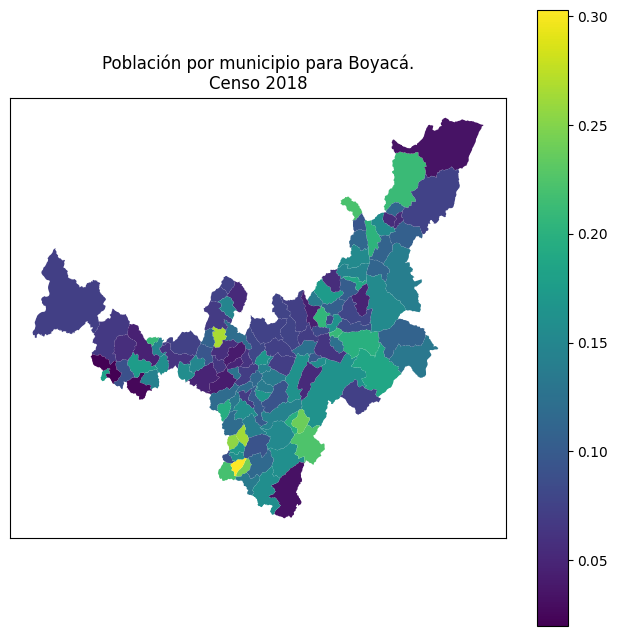

In [ ]:
mpio_filtrado = mpio_gdf_cuidado.loc[mpio_gdf_cuidado["dpto_ccdgo"]=="15"]
dpto_nombre = mpio_filtrado["dpto_cnmbr"].unique()[0]

fig,ax = plt.subplots(figsize=(8,8))

mpio_filtrado.plot(ax=ax,column="N_dificultad_per_cap",legend=True)
ax.set_title(f"Población por municipio para {dpto_nombre.title()}.\nCenso 2018")

ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

### **Ejemplo de un aplicación en Dash**

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.4 MB/s eta 0:00:00
